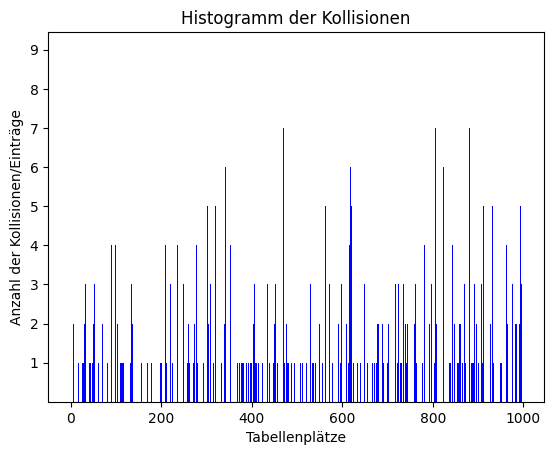

In [3]:
import csv
import matplotlib.pyplot as plt
from array import array

#Todo: nach Input werten im Bloom array suchen können ob es true oder false ist

#Datei Lesen, inputgröße durch Benutzereingabe festlegen und alle wörter bis zur gewissen anzahl speichern
def read_csv_file(file_path, num_rows):
    rows = []
    with open(file_path, 'r', encoding='ISO-8859-1') as file:
        csv_reader = csv.reader(file)
        for _ in range(num_rows):
            rows.append(next(csv_reader))
    return rows

#Ascii Code berechnen und an Key übergeben
def key_Wert(input_Wert):
    key = 0
    for buchstabe in input_Wert:
        key += ord(buchstabe)
    return key

#Key einsetzen, quadrieren, die Größe des Mittleren Wert daraus berechen, % der Hashsize und zurück geben
def mid_square_hash(input_key: int, hashsize):
    squared = input_key * input_key
    str_squared = str(squared)
    length = len(str_squared)
    num_digits = len(str(hashsize))
    start = (length - num_digits) // 2
    end = start + num_digits
    mid_value = int(str_squared[start:end])
    return mid_value % hashsize

#Bloom array je nach Größe mit nullen erstellen
bloom_bit_Size = 100
def create_bit_array(size):
    return array([0] * size)
#Je nach Bloom output den index auf 1 stellen
def set_bit(bit_array, index):
    bit_array[index] = 1

file_path = "/Users/furkan/Downloads/archive/de_DE.csv"

hashsize = int(input("Bitte geben Sie die gewünschte Hashgröße ein: "))
num_rows = int(input("Bitte geben Sie die Anzahl der Inputwerte ein: "))

#Alle Wörter in rows speichern
rows = read_csv_file(file_path, num_rows)

hashliste = set()
collision_count = {i: 0 for i in range(hashsize)}
#Bloom array erstellen. Größe 100 vorgegeben
bloom_array = create_bit_array(bloom_bit_Size)

#Key wert von den Wörtern berechnen, hashwert berechnen und checken ob es den Wert gab und jenachdem zur liste hinzufügen oder anzahl der Kollsionen berechnen
for row in rows:
    key = key_Wert(str(row))
    hashwert = mid_square_hash(key, hashsize)
    #Bloom output Werte erzeugen. 
    bloom_bit_Wert = hashwert % bloom_bit_Size
    #Bloom Output Index Werte im array auf 1 setzen
    set_bit(bloom_array, bloom_bit_Wert)
    
    if hashwert in hashliste:
        collision_count[hashwert] += 1
    else:
        hashliste.add(hashwert)
        collision_count[hashwert] = 1 
        

used_slots = {k: v for k, v in collision_count.items() if v >= 1}

# Histogramm
plt.bar(used_slots.keys(), used_slots.values(), color='blue')
plt.xlabel('Tabellenplätze')
plt.ylabel('Anzahl der Kollisionen/Einträge')
plt.title('Histogramm der Kollisionen')
plt.yticks(range(1, 10))  
plt.show()




